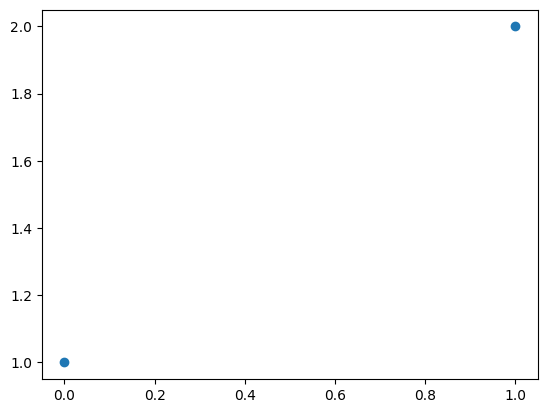

In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [2]:
importlib.reload(kgs)
data=kgs.load_all_train_data()
print(len(data))
for d in data:
    d.check_constraints()
import seis_nn
model = seis_nn.default_pretrained
model.batch_size = 1
data = model.infer(data)

10000
F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


100%|██████████████████████████████████████████████████████████████████████████████| 9901/9901 [14:38<00:00, 11.27it/s]


In [3]:
vals_not = []
vals_styleA = []
vals_styleB = []
import seis_prior
prior = seis_prior.SquaredExponential()
prior.transform = False
prior.basis_functions()
from tqdm import tqdm
import cupy as cp
print('WRONG')
for d in tqdm(data):
    d.load_to_memory()
    x = d.velocity.to_vector()        
    kpi = np.log(cp.asnumpy(x[:-1,:].T@(prior.P)@x[:-1,:])[0,0])
    #kpi = cp.asnumpy(kgs.rms(d.seismogram.data[0,...] - cp.flip(d.seismogram.data[4,...],axis=1)))
    if 'Style_A' in d.family:
        vals_styleA.append(kpi)
    elif 'Style_B' in d.family:
        vals_styleB.append(kpi)
    else:
        vals_not .append(kpi)
        if kpi<1e-4:
            plt.figure()
            plt.imshow(cp.asnumpy(d.velocity.data))
            plt.title(d.family+' '+str(kpi))
            plt.pause(0.001)
    d.unload()

False False
(4901, 4901)
WRONG


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:36<00:00, 103.86it/s]


(14.37961852531303, 20.244063399929612, 11.074864816192283)

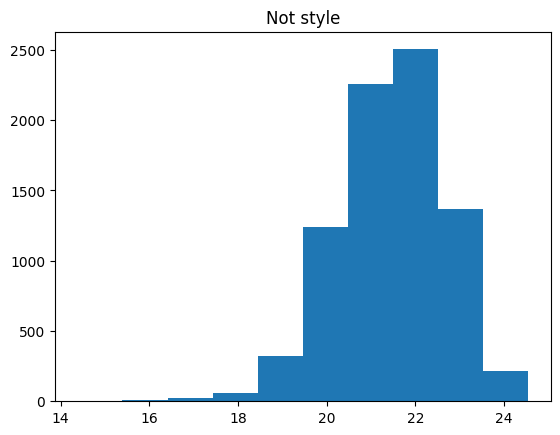

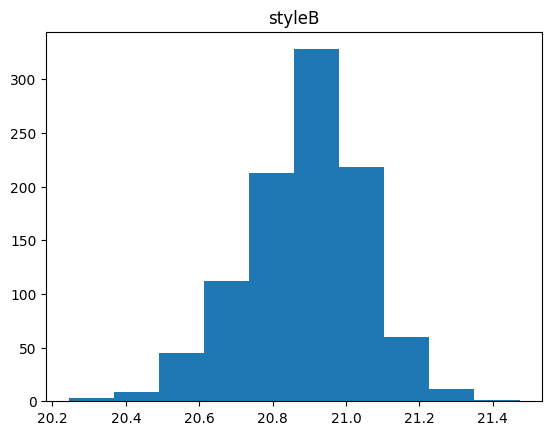

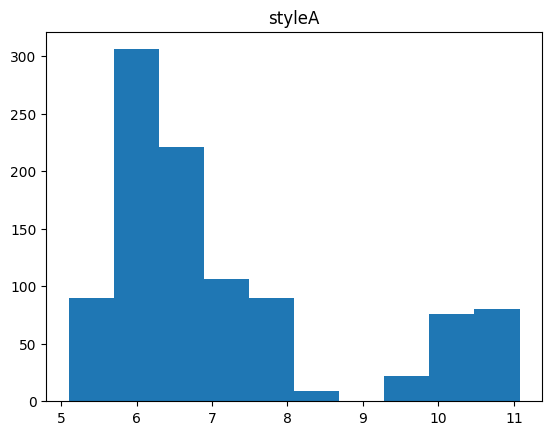

In [5]:
plt.figure()
plt.hist(vals_not)
plt.title('Not style')
plt.figure()
plt.hist(vals_styleB)
plt.title('styleB')
plt.figure()
plt.hist(vals_styleA)
plt.title('styleA')
np.min(vals_not), np.min(vals_styleB), np.max(vals_styleA)